

# Project: Investigate the dataset (No-Show_Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>**This is the dataset of the information about medical appointments in Brazil. It is focused on the question of whether or not patients show up for their appointment, with several characteristics of the patient collected also.**

>Based on the features in the dataset, the following question will be explored:
> <li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>

> **This question will be sub-divided into the following:**
><li> Does the socio-demographics of the patients(age, gender) influence their showing up for their scheduled appointment?</li>
><li> Did those that received SMS about their appointment Day showed up  more for their scheduled appointment?</li>

>*The dependent variable will be "no_show" while the independent variables will be the various features that will help to answer the questions posed above.*

In [1]:
# Import useful libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset( a csv file) and perform operations to inspect the data for types, missing or possibly eerant data.

df_no_show_appointments = pd.read_csv("no_show_appointments.csv")


In [3]:
#Let us see the first five rows of the dataset to see what it looks like
df_no_show_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Let's also look at the last 5 rows of the dataset
df_no_show_appointments.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#Let also know the total number of data in the rows and columns
df_no_show_appointments.shape

(110527, 14)

In [6]:
#Extract information about our dataset, such as the datatypes and null values.
df_no_show_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#let us check for missing data
df_no_show_appointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#Lets check for duplicated values
df_no_show_appointments.duplicated().sum()

0

From the foregoing, the following information could be deduced;

> Total number of rows     = 110,527

> Total number of columns  = 14

> Missing data             = 0

> Duplicated data          = 0

>The Columns are in their correct datatypes

### Data Cleaning / Wrangling

>All column labels will be renamed such that dash (-) will be replaced with underscores(_). Everything will thereafter be converted to lower cases to ensure uniformity and make it easier for analysis.

>**Some columns that will not help us to answer the questions above will be dropped.**
 >Therefore, the following columns will be dropped: - [PatientId, AppointmentID, ScheduleDay, AppointmentDay]
 
 


In [9]:
df_no_show_appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# Replace dash(-) with underscores(_) and lower case labels

df_no_show_appointments.rename(columns = lambda x: x.strip().lower().replace("-", "_"), inplace = True)

In [11]:
#Confirm Changes
df_no_show_appointments.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
#Drop the following columns [patientId, appointmentid, scheduleday, appointmentday]
df_no_show_appointments.drop(["patientid", "appointmentid", "scheduledday", "appointmentday",], axis = 1, inplace = True)

In [13]:
#Confirm Changes
df_no_show_appointments.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
.

### Research Question 1 (Does the socio-demographics of the patients(age, gender) influence their showing up for their scheduled appointment?)
This can be further broken down into the following:

> a. which age group shows up more for their scheduled appointment based on the median age?


> b. Which gender shows up more for their scheduled appointment?


In [14]:
# Let's answer question 1a here (i.e age group versus showing up for scheduled appointment)

df_no_show_appointments.age.median()

37.0

In [15]:
#from above, the median age is 37 years. we are to extract the number of patients less than or  37 years who shows up for
# their scheduled appointment; same also applies to those above 37 years of age.
#so, now lets get those patients <= 37 years.

age_less_than_or_equal_to_37_years = df_no_show_appointments[df_no_show_appointments["age"] <= 37]
age_less_than_or_equal_to_37_years.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No
10,F,30,NOVA PALESTINA,0,0,0,0,0,0,No


In [16]:
#Let's also get those patients > 37 years old
age_greater_than_37_years = df_no_show_appointments[df_no_show_appointments["age"] > 37]
age_greater_than_37_years.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No


In [17]:
#Now, let us get the counts of those <=37 years according to their showing up for scheduled appointment
counts_for_less_than_37_years_no_show = age_less_than_or_equal_to_37_years["no_show"].value_counts()
counts_for_less_than_37_years_no_show

No     43356
Yes    12761
Name: no_show, dtype: int64

In [18]:
#lets convert it to % because it will be better appreciated that way!
#But first of all, lets get the total count  for those <=37 years
total_counts_for_less_than_or_equal_to_37 = counts_for_less_than_37_years_no_show.sum()

total_counts_for_less_than_or_equal_to_37

56117

In [19]:
#converting to %
percentage = (counts_for_less_than_37_years_no_show / total_counts_for_less_than_or_equal_to_37)*100

percentage


No     77.26001
Yes    22.73999
Name: no_show, dtype: float64

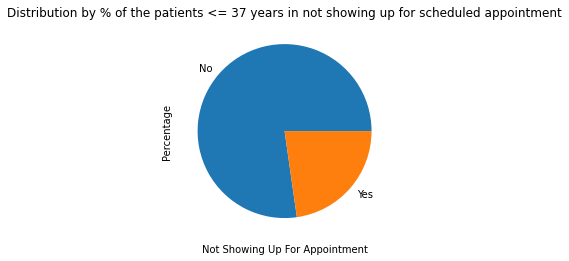

In [20]:
#Let's visualize the result above
percentage.plot(kind = "pie", figsize = (5, 4));
plt.title("Distribution by % of the patients <= 37 years in not showing up for scheduled appointment")
plt.xlabel("Not Showing Up For Appointment")
plt.ylabel("Percentage");

In [21]:
#let do same for those >37 years old(median age)

counts_for_greater_than_37_years_no_show = age_greater_than_37_years["no_show"].value_counts()
total_counts_for_greater_than_37 = counts_for_greater_than_37_years_no_show.sum()

counts_for_greater_than_37_years_no_show, total_counts_for_greater_than_37

(No     44852
 Yes     9558
 Name: no_show, dtype: int64,
 54410)

In [22]:
#lets convert to percentage to make it easier to appreciate
percentage_for_greater_than_37_years = (counts_for_greater_than_37_years_no_show / total_counts_for_greater_than_37)*100

percentage_for_greater_than_37_years


No     82.433376
Yes    17.566624
Name: no_show, dtype: float64

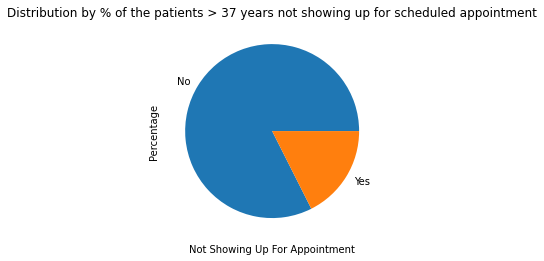

In [23]:
#Let's visualize the result above
percentage_for_greater_than_37_years.plot(kind = "pie", figsize = (5, 4));
plt.title("Distribution by % of the patients > 37 years not showing up for scheduled appointment")
plt.xlabel("Not Showing Up For Appointment")
plt.ylabel("Percentage");

### Question 1b - Which gender shows up more for their scheduled appointment?

In [44]:
#lets get general overview of the features of the gender column, most espeically the total count which we will use to
# calculate the percentage before plotting.
df_no_show_appointments["gender"].describe()


count     110527
unique         2
top            F
freq       71840
Name: gender, dtype: object

In [38]:
#lets get the different count by gender with regards to them not showing up for their scheduled appointment.

counts_by_gender = df_no_show_appointments.groupby(["no_show", "gender"])["neighbourhood"].count()
counts_by_gender

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: neighbourhood, dtype: int64

In [41]:
#Lets convert to percentage to make it easier to appreciate.

percentage_by_gender = (counts_by_gender / 110527)*100
percentage_by_gender

no_show  gender
No       F         51.793679
         M         28.013065
Yes      F         13.204013
         M          6.989242
Name: neighbourhood, dtype: float64

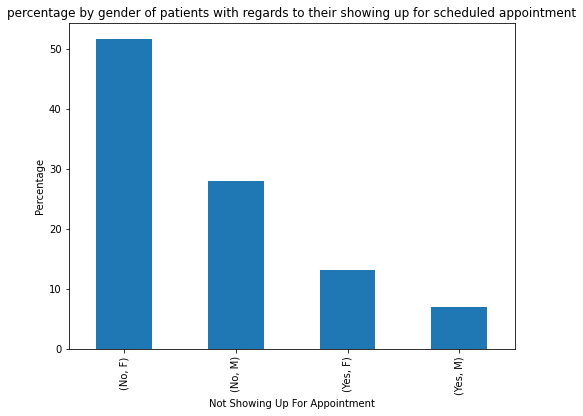

In [43]:
#Let's visualize the result above
percentage_by_gender.plot(kind = "bar", figsize = (8,6))
plt.title("percentage by gender of patients with regards to their showing up for scheduled appointment")
plt.xlabel("Categorization by Gender and Not Showing Up For Appointment")
plt.ylabel("Percentage");

### Question 2 - Did those that received SMS about their appointment Day showed up  more for their scheduled appointment?

In [45]:
# lets get the columns of our dataset
df_no_show_appointments.head(1)


,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [46]:
#The counts by sms received and not showing up for appointment using gender for grouping
# here '0' on the 'sms_received' column stands for those that did not recived sms while '1' stands for those that recieved.

counts_by_sms_received = df_no_show_appointments.groupby(["sms_received", "no_show"])["gender"].count()
counts_by_sms_received

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: gender, dtype: int64

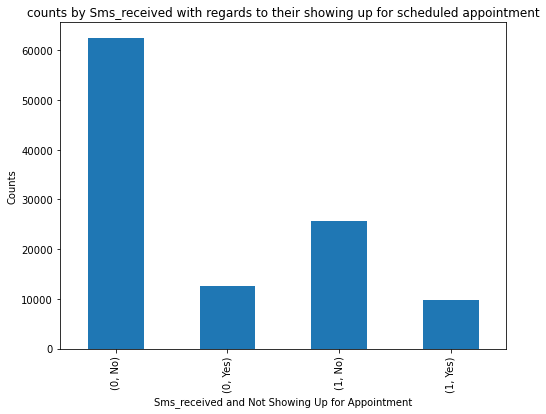

In [47]:
#lets visualize the result above
counts_by_sms_received.plot(kind= "bar", figsize = (8,6));
plt.title("counts by Sms_received with regards to their not showing up for scheduled appointment")
plt.xlabel("Sms_received and Not Showing Up for Appointment")
plt.ylabel("Counts");

In [48]:
# let us convert it to percentage to make it easy to appreciate.
#This can be done by dividing the 'counts_by_sms_received' by the total number of patients in the dataset
# and multplying it by 100

percentages_for_sms_recived = (counts_by_sms_received / 110527)*100
percentages_for_sms_recived 

sms_received  no_show
0             No         56.556317
              Yes        11.341120
1             No         23.250427
              Yes         8.852136
Name: gender, dtype: float64

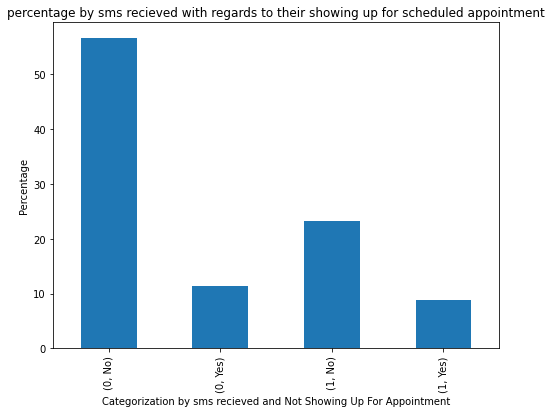

In [49]:
#Let's visualize the result above
percentages_for_sms_recived.plot(kind = "bar", figsize = (8,6))
plt.title("percentage by sms recieved with regards to their showing up for scheduled appointment")
plt.xlabel("Categorization by sms recieved and Not Showing Up For Appointment")
plt.ylabel("Percentage");

<a id='conclusions'></a>
## Conclusions


> Insight_1: From the dataset, among those <= the median age (37 years), 77.3% of them showed up for their scheduled appointment.

> Insight_2: Among those > the median age(37 years), 82% showed for their scheduled appointment.

> Insight_3: As regards gender, 51.8% out of 65% female showed up for their scheduled appointment as compared to the male where
> 28.0% out of the total 35% showed up.

> Insight_4: As regards if sms was received, among the 67.9% who did not receive sms, 56.6% showed up for their scheduled appointment.

> Insight_5: Among the 32.1% of those who recieved sms, 23.3% showed up.